# Alveoli and acinar size
This document is used to plot the acinar volumes and stereological counts for the alveolar manuscript.

First, we set up the notebook.

In [70]:
#Load the data and set up notebook
import matplotlib.pyplot as plt
%matplotlib inline
import platform
import glob
import os
import pandas
import seaborn
import re

In [71]:
def get_git_hash():
    """
    Get the current git hash from the repository.
    Based on http://stackoverflow.com/a/949391/323100 and http://stackoverflow.com/a/18283905/323100
    """
    from subprocess import Popen, PIPE
    import os
    gitprocess = Popen(['git', '--git-dir', os.path.join(os.getcwd(), '.git'),
                        'rev-parse', '--short', '--verify', 'HEAD'],
                       stdout=PIPE)
    (output, _) = gitprocess.communicate()
    return output.strip().decode("utf-8")

In [72]:
the_current_git_hash = get_git_hash()
print('We are working with version %s of the analyis notebook' % the_current_git_hash)

We are working with version 5e4e138 of the analyis notebook


In [73]:
# Display defaults
plt.rc('image', cmap='gray', interpolation='nearest') # Display all images in b&w
plt.rcParams['figure.figsize'] = (16, 9)  # Size up figures a bit

Now we load the 'Count' data from Eveline.

In [32]:
# Different locations if running either on Linux or Windows
if 'debian' in platform.dist():
    drive = '/run/user/1000/gvfs/smb-share:server=nas.ana.unibe.ch,share='
else:
    drive = '\\\\nas.ana.unibe.ch\\'
# Load the data from this folder
RootPath = drive + os.path.join('gruppe_schittny', 'Data', 'doc', 'David')
print('We are loading all the data from %s' % RootPath)

We are loading all the data from \\nas.ana.unibe.ch\gruppe_schittny\Data\doc\David


In [33]:
# Get a list of *all* excel files that Eveline exported from the STEPanizer
# Based on https://stackoverflow.com/a/14798263
StepanizerFiles = sorted(glob.glob(os.path.join(RootPath, 'Eveline', '**/*.xls'), recursive=True))

In [34]:
# Generate an empty dataframe where we save the counts
Counts = pandas.DataFrame()

In [35]:
# Save the filename into the dataframe
Counts = pandas.DataFrame({'Location': StepanizerFiles})

In [36]:
# # Grab relevant data from filenames
# for f in StepanizerFiles:
#     print('Animal', os.path.basename(f).split('_R108C')[1].split('mrg-')[0][:3])
#     print('Day', os.path.basename(f).split('_R108C')[1].split('mrg-')[0][:2])
#     print('Acinus', os.path.basename(f).split('acinus')[1].split('_')[0])

In [37]:
Counts = pandas.DataFrame({'Location_Counts': StepanizerFiles})
Counts['Filename_Counts'] = [os.path.basename(f) for f in StepanizerFiles]
Counts['Animal'] = [os.path.basename(f).split('_R108C')[1].split('mrg-')[0][:3] for f in StepanizerFiles]
Counts['Day'] = [int(os.path.basename(f).split('_R108C')[1].split('mrg-')[0][:2]) for f in StepanizerFiles]
Counts['Acinus'] = [int(os.path.basename(f).split('acinus')[1].split('_')[0]) for f in StepanizerFiles]

In [38]:
# nr=16
# tmp=pandas.read_csv(StepanizerFiles[nr], nrows=13, delimiter='\t')
# # https://stackoverflow.com/a/31814158
# print('Eveline made', tmp['Total'][9], 'counts for', os.path.basename(StepanizerFiles[nr]))
# tmp

In [39]:
Counts['Counts'] = [int(pandas.read_csv(f, nrows=13, delimiter='\t')['Total'][10]) for f in StepanizerFiles]

In [40]:
Counts.head()

,Location_Counts,Filename_Counts,Animal,Day,Acinus,Counts
0,\\nas.ana.unibe.ch\gruppe_schittny\Data\doc\Da...,_R108C04At-mrg-acinus11_2013-03-12_13-40_resul...,04A,4,11,11
1,\\nas.ana.unibe.ch\gruppe_schittny\Data\doc\Da...,_R108C04At-mrg-acinus12_2013-03-12_15-10_resul...,04A,4,12,6
2,\\nas.ana.unibe.ch\gruppe_schittny\Data\doc\Da...,_R108C04At-mrg-acinus16_2013-03-12_15-43_resul...,04A,4,16,26
3,\\nas.ana.unibe.ch\gruppe_schittny\Data\doc\Da...,_R108C04At-mrg-acinus20_2013-03-12_16-01_resul...,04A,4,20,28
4,\\nas.ana.unibe.ch\gruppe_schittny\Data\doc\Da...,_R108C04At-mrg-acinus21_2013-03-12_16-19_resul...,04A,4,21,16


In [41]:
Counts.tail()

,Location_Counts,Filename_Counts,Animal,Day,Acinus,Counts
286,\\nas.ana.unibe.ch\gruppe_schittny\Data\doc\Da...,_R108C60Et-mrg-acinus08_2012-09-27_13-47_resul...,60E,60,8,385
287,\\nas.ana.unibe.ch\gruppe_schittny\Data\doc\Da...,_R108C60Et-mrg-acinus11_2012-10-22_13-23_resul...,60E,60,11,369
288,\\nas.ana.unibe.ch\gruppe_schittny\Data\doc\Da...,_R108C60Et-mrg-acinus12_2012-09-27_09-21_resul...,60E,60,12,472
289,\\nas.ana.unibe.ch\gruppe_schittny\Data\doc\Da...,_R108C60Et-mrg-acinus13_2012-09-27_10-20_resul...,60E,60,13,320
290,\\nas.ana.unibe.ch\gruppe_schittny\Data\doc\Da...,_R108C60Et-mrg-acinus14_2012-09-27_12-10_resul...,60E,60,14,540


In [42]:
# For D60, Eveline counted only half of the images, we thus double the counts for this day.
Counts.loc[Counts.Day == 60, 'Counts'] = 2*Counts['Counts']

In [43]:
Counts.tail()

,Location_Counts,Filename_Counts,Animal,Day,Acinus,Counts
286,\\nas.ana.unibe.ch\gruppe_schittny\Data\doc\Da...,_R108C60Et-mrg-acinus08_2012-09-27_13-47_resul...,60E,60,8,770
287,\\nas.ana.unibe.ch\gruppe_schittny\Data\doc\Da...,_R108C60Et-mrg-acinus11_2012-10-22_13-23_resul...,60E,60,11,738
288,\\nas.ana.unibe.ch\gruppe_schittny\Data\doc\Da...,_R108C60Et-mrg-acinus12_2012-09-27_09-21_resul...,60E,60,12,944
289,\\nas.ana.unibe.ch\gruppe_schittny\Data\doc\Da...,_R108C60Et-mrg-acinus13_2012-09-27_10-20_resul...,60E,60,13,640
290,\\nas.ana.unibe.ch\gruppe_schittny\Data\doc\Da...,_R108C60Et-mrg-acinus14_2012-09-27_12-10_resul...,60E,60,14,1080


In [44]:
print('We have %s acini which Eveline assessed with the STEPanizer' % len(Counts))

We have 291 acini which Eveline assessed with the STEPanizer


In [48]:
# Let's get a quick overview of the data
Counts.groupby(by=['Day', 'Animal'])['Counts'].describe()

Day  Animal       
4    04A     count      56.000000
             mean       25.089286
             std        23.150320
             min         3.000000
             25%         9.750000
             50%        16.000000
             75%        32.750000
             max       111.000000
     04B     count      23.000000
             mean       65.043478
             std        43.849410
             min        15.000000
             25%        34.500000
             50%        53.000000
             75%        80.000000
             max       171.000000
     04C     count      51.000000
             mean       60.509804
             std        45.424387
             min        10.000000
             25%        29.500000
             50%        52.000000
             75%        77.000000
             max       249.000000
10   10A     count      27.000000
             mean       77.851852
             std        56.305283
             min        18.000000
             25%        28.50

In [49]:
# Set ourselves a palette, based on the individual unique sample names
# The dictionary palette setting is based on the comments in https://stackoverflow.com/q/36554075/323100
ourcolors=seaborn.color_palette('husl', len(pandas.unique(Counts.Animal)))
ourpalette = {animal:ourcolors[c] for c, animal in enumerate(pandas.unique(Counts.Animal))}

In [50]:
# Set indivdual measurement color (in dataframe)
Counts['Color'] = [None] * len(Counts)
for c,animal in enumerate(Counts.Animal):
    for d,i in enumerate(pandas.unique(Counts.Animal)):
        if animal == i:
            Counts.set_value(c, 'Color', ourcolors[d])

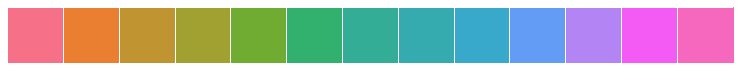

In [51]:
seaborn.palplot(ourcolors)

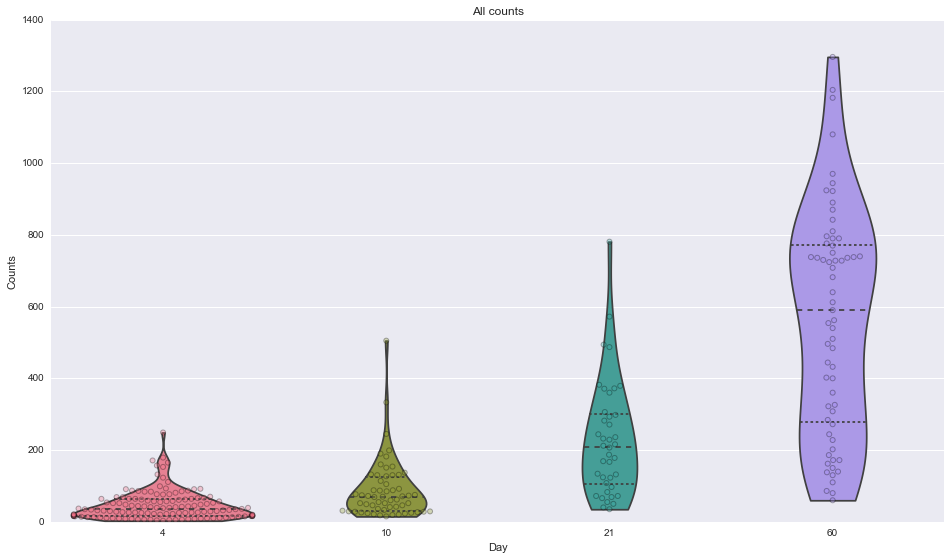

In [53]:
seaborn.violinplot(data=Counts, x='Day', y='Counts', cut=0, scale='count',
               palette=seaborn.color_palette('husl', len(pandas.unique(Counts.Day))), inner='quartiles')
seaborn.swarmplot(data=Counts, x='Day', y='Counts', split=False, linewidth=1,
              palette=seaborn.color_palette('husl', len(pandas.unique(Counts.Day))), edgecolor='k', alpha=0.309)
plt.title('All counts')
plt.ylim(ymin=0)
plt.show()

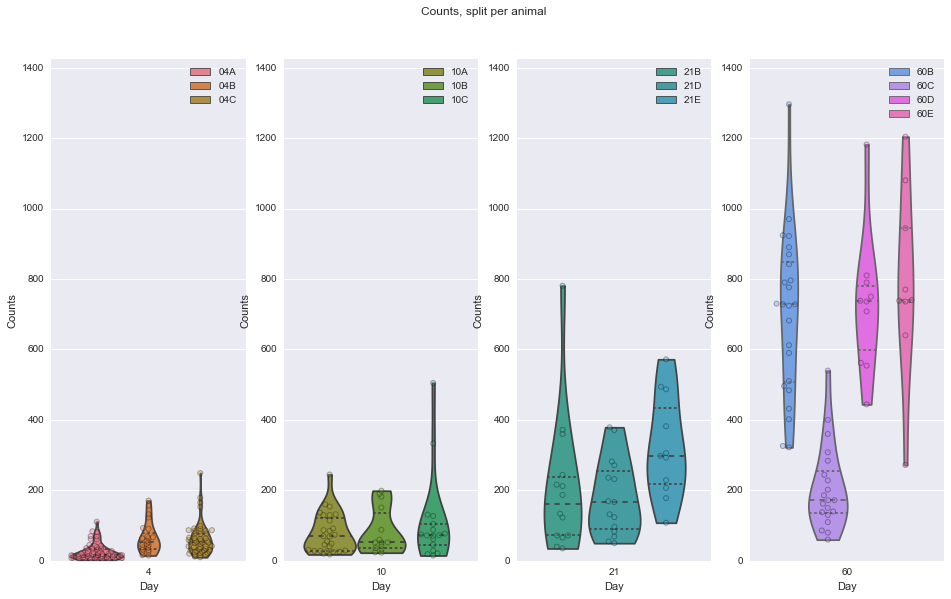

In [54]:
for c,d in enumerate(pandas.unique(Counts.Day)):
    plt.subplot(1,len(pandas.unique(Counts.Day)),c+1)
    bxplt = seaborn.violinplot(data=Counts.loc[Counts.Day == d], x='Day', y='Counts',
                           hue='Animal', palette=ourpalette, cut=0, inner='quartiles')
    swrmplt = seaborn.swarmplot(data=Counts.loc[Counts.Day == d], x='Day', y='Counts', hue='Animal',
                            split=True, linewidth=1, palette=ourpalette, edgecolor='k', alpha=0.309)
    handles, labels = plt.gca().get_legend_handles_labels()
    plt.ylim([0,1.1*Counts.Counts.max()])
    bxplt.legend(handles[:len(handles)//2], labels[:len(labels)//2])
plt.suptitle('Counts, split per animal')
plt.show()

Let's now load the volume data.

First directly from `anatera4`, where I originally exported the DICOM files from MeVisLab

In [57]:
# Different locations if running either on Linux or Windows
if 'debian' in platform.dist():
    drive = '/run/user/1000/gvfs/smb-share:server=anatera4,share='
else:
    drive = '\\\\anatera4\\'
# Load the data from this folder
terastation = drive + os.path.join('share', 'SLS')
print('We are loading all the data from %s' % terastation)

We are loading all the data from \\anatera4\share\SLS


In [58]:
import timeit
# tic=timeit.default_timer()
# # Do Stuff
# toc=timeit.default_timer()
# toc - tic #elapsed time in seconds

In [63]:
# Get a list of *all* DICOM files that I exported aeons ago
# Based on https://stackoverflow.com/a/14798263
print('We scan %s for "R108*.dcm" files' % terastation)
tic=timeit.default_timer()
AcinarVolumeFiles= sorted(glob.glob(os.path.join(terastation, '**/R108*.dcm'), recursive=True))
toc=timeit.default_timer()
print('We found %s DICOM files in %s minutes' % (len(AcinarVolumeFiles), round(float((toc - tic)/60.),1)))

We scan \\anatera4\share\SLS for "R108*.dcm" files
We found 811 DICOM files in 57.6 minutes


In [64]:
# Generate an empty dataframe where we save the volumes
VolumesFromDisk = pandas.DataFrame()

In [65]:
# sorted(AcinarVolumeFiles_glob)[:5]

In [66]:
# Save the filename into the dataframe
VolumesFromDisk = pandas.DataFrame({'Location': AcinarVolumeFiles})

In [86]:
# # Grab relevant data from filenames
# for f in AcinarVolumeFiles:
#     print(os.path.basename(f))
#     print('Animal', os.path.basename(f).split('R108C')[1].split('mrg.')[0][:-2])
#     print('Day', os.path.basename(f).split('R108C')[1].split('mrg')[0][:2])
#     print('Acinus', os.path.basename(f).split('.acinus')[1].split('.volume')[0])
#     print('Volume', os.path.basename(f).split('.volume')[1].split('.pixelsize')[0])
#     print('Scantime', os.path.dirname(f).split('SLS')[1].split(os.sep)[1])
#     print(80*'-')

In [87]:
# # Some names (see output of this cell) derive from the R108C$Day$$Animal$ scheme.
# # We catch them with the intricate .split() in the cells below...
# for i in VolumesFromDisk.File:
#     if len(i.split('mrg')[0][len('R108C'):-2]) >3:
#         tmp.append(i.split('mrg')[0][len('R108C'):-2])
# for i in pandas.unique(tmp):
#     print(i)

In [88]:
VolumesFromDisk = pandas.DataFrame({'Location': AcinarVolumeFiles})
VolumesFromDisk['File'] = [os.path.basename(f) for f in AcinarVolumeFiles]
VolumesFromDisk['Animal'] = [os.path.basename(f).split('mrg')[0][len('R108C'):len('R108C')+3]
                             for f in AcinarVolumeFiles]
VolumesFromDisk['Scantime'] = [os.path.dirname(f).split('SLS')[1].split(os.sep)[1]
                          for f in AcinarVolumeFiles]
VolumesFromDisk['Day'] = [int(os.path.basename(f).split('mrg')[0][len('R108C'):len('R108C')+2])
                          for f in AcinarVolumeFiles]
VolumesFromDisk['Acinus'] = [int(os.path.basename(f).split('.acinus')[1].split('.volume')[0])
                             for f in AcinarVolumeFiles]
VolumesFromDisk['Volume'] = [float(os.path.basename(f).split('.volume')[1].split('.pixelsize')[0])
                             for f in AcinarVolumeFiles]

In [89]:
print('We have %s acini where we got the volumes' % len(VolumesFromDisk))

We have 811 acini where we got the volumes


In [90]:
VolumesFromDisk.groupby(by=['Day', 'Animal'])['Volume'].describe()

Day  Animal       
4    04A     count    51.000000
             mean      0.005778
             std       0.005166
             min       0.000918
             25%       0.002298
             50%       0.003587
             75%       0.007537
             max       0.021516
     04B     count    23.000000
             mean      0.035109
             std       0.034599
             min       0.006500
             25%       0.013876
             50%       0.022904
             75%       0.034274
             max       0.120925
     04C     count    51.000000
             mean      0.028898
             std       0.024524
             min       0.004333
             25%       0.012543
             50%       0.023724
             75%       0.038294
             max       0.134680
     04D     count    44.000000
             mean      0.024475
             std       0.023928
             min       0.003994
             25%       0.009371
             50%       0.016748
                     

In [91]:
# Update palette, since we might have more animals than what we had above in cell 19
ourcolors=seaborn.color_palette('husl', len(pandas.unique(VolumesFromDisk.Animal)))
ourpalette = {animal:ourcolors[c] for c, animal in enumerate(sorted(pandas.unique(VolumesFromDisk.Animal)))}

In [92]:
# for c,d in enumerate(sorted(pandas.unique(VolumesFromDisk.Day))):
#     print(d)
#     print(pandas.unique(VolumesFromDisk.loc[VolumesFromDisk.Day == d]['Animal']))

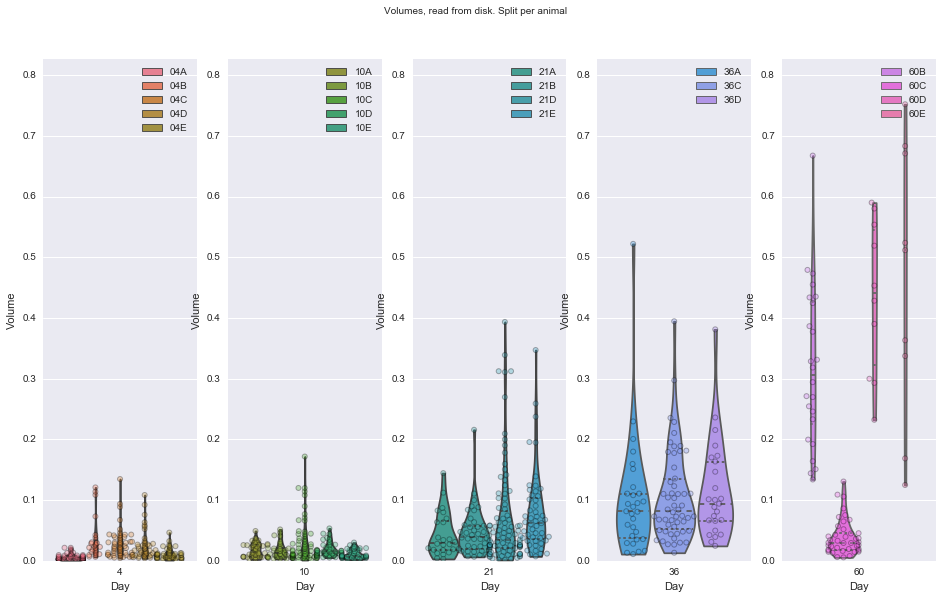

In [93]:
for c,d in enumerate(sorted(pandas.unique(VolumesFromDisk.Day))):
    plt.subplot(1,len(pandas.unique(VolumesFromDisk.Day)),c+1)
    bxplt = seaborn.violinplot(data=VolumesFromDisk.loc[VolumesFromDisk.Day == d], x='Day', y='Volume',
                               hue='Animal',
                               # Because the animals are preferentially sorted on the beamtime name, we have
                               # to jump through the hoop below and sort the hues on the 'Animal' in addition
                               # to what we did for Evelines counts where all the data is in *one* folder
                               # Just comment the line to see the difference (a correct plot, but ugly sort :)
                               hue_order=sorted(pandas.unique(VolumesFromDisk.loc[VolumesFromDisk.Day == d]['Animal'])),
                               palette=ourpalette, cut=0, inner='quartiles')
    swrmplt = seaborn.swarmplot(data=VolumesFromDisk.loc[VolumesFromDisk.Day == d], x='Day', y='Volume',
                                hue='Animal',
                                hue_order=sorted(pandas.unique(VolumesFromDisk.loc[VolumesFromDisk.Day == d]['Animal'])),
                                split=True, linewidth=1, palette=ourpalette, edgecolor='k', alpha=0.309)
    handles, labels = plt.gca().get_legend_handles_labels()
    plt.ylim([0,1.1*VolumesFromDisk.Volume.max()])
    bxplt.legend(handles[:len(handles)//2], labels[:len(labels)//2])
plt.suptitle('Volumes, read from disk. Split per animal')
plt.show()

Now we 'just' have to concatenate the two dataframes :)

In [94]:
# Merge the dataframes: http://pandas.pydata.org/pandas-docs/stable/merging.html
# This seems to discard all entries that are *not* found in both df's
print('\n\nTODO: confirm values by randomly sampling some file names and Count XLS sheets\n\n')
Merged = pandas.merge(Counts, VolumesFromDisk)



TODO: confirm values by randomly sampling some file names and Count XLS sheets




In [95]:
Merged['CpV'] = Merged['Counts']/Merged['Volume']

In [101]:
# Doublecheck
import numpy.random
for i in range(3):
    print(80*'-')
    print(Merged.loc[numpy.random.randint(len(Merged))].to_dense())

--------------------------------------------------------------------------------
Location_Counts    \\nas.ana.unibe.ch\gruppe_schittny\Data\doc\Da...
Filename_Counts    _R108C04At-mrg-acinus48_2013-04-05_12-12_resul...
Animal                                                           04A
Day                                                                4
Acinus                                                            48
Counts                                                            81
Color              (0.9677975592919913, 0.44127456009157356, 0.53...
Location           \\anatera4\share\SLS\2010a\mrg\R108C04At-mrg\R...
File               R108C04At-mrg.2936x2936x1024.gvr.acinus48.volu...
Scantime                                                       2010a
Volume                                                     0.0136116
CpV                                                          5950.81
Name: 26, dtype: object
-------------------------------------------------------------------

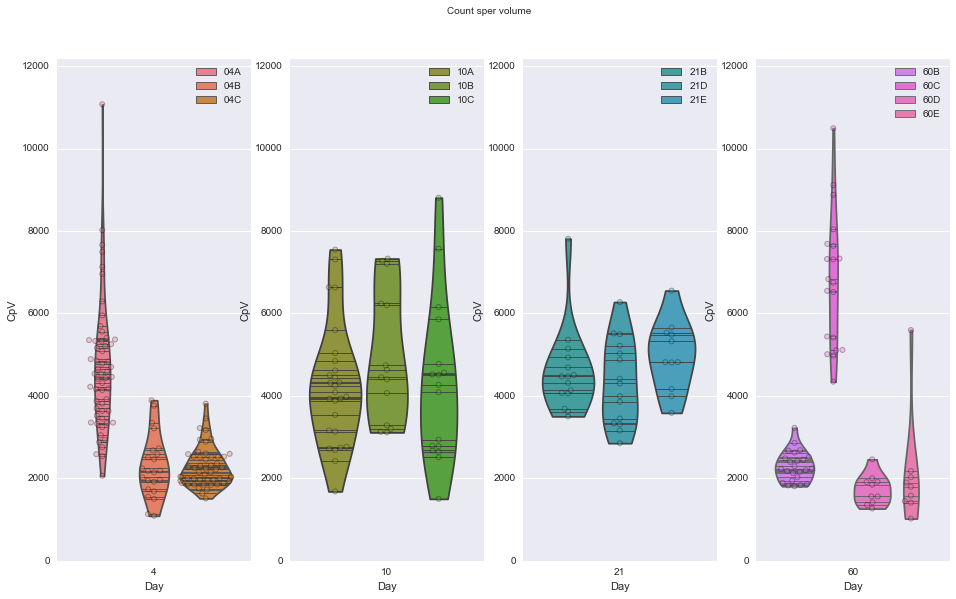

In [97]:
for c,d in enumerate(sorted(pandas.unique(Merged.Day))):
    plt.subplot(1,len(pandas.unique(Merged.Day)),c+1)
    bxplt = seaborn.violinplot(data=Merged.loc[Merged.Day == d], x='Day', y='CpV',
                               hue='Animal',
                               hue_order=sorted(pandas.unique(Merged.loc[Merged.Day == d]['Animal'])),
                               palette=ourpalette, cut=0, inner='stick')
    swrmplt = seaborn.swarmplot(data=Merged.loc[Merged.Day == d], x='Day', y='CpV',
                                hue='Animal',
                                hue_order=sorted(pandas.unique(Merged.loc[Merged.Day == d]['Animal'])),
                                split=True, linewidth=1, palette=ourpalette, edgecolor='k', alpha=0.309)
    handles, labels = plt.gca().get_legend_handles_labels()
    plt.ylim([0,1.1*Merged.CpV.max()])
    bxplt.legend(handles[:len(handles)//2], labels[:len(labels)//2])
plt.suptitle('Count sper volume')
plt.show()

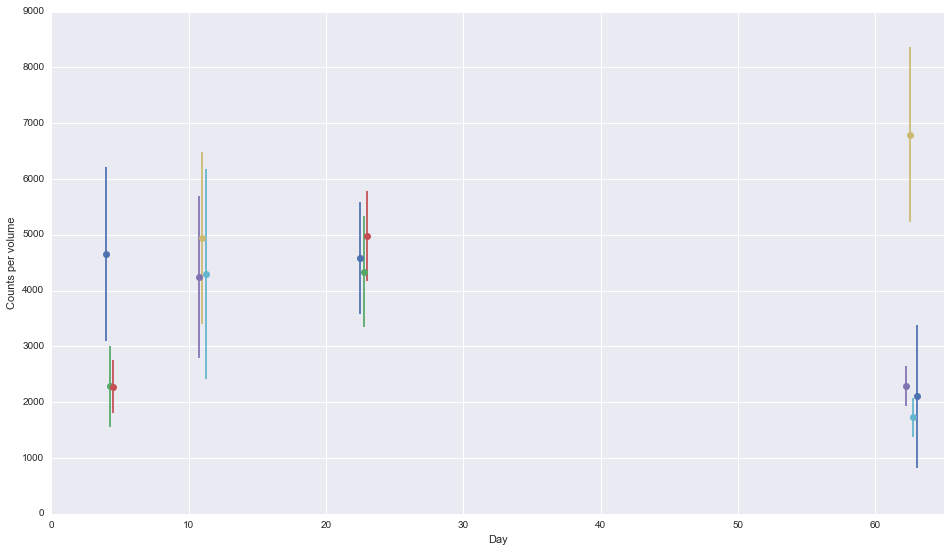

In [133]:
for c,d in enumerate(pandas.unique(Merged.Animal)):
#     print(d)
#     print(numpy.mean(Merged.loc[Merged.Animal == d]['Day']))
#     print(numpy.mean(Merged.loc[Merged.Animal == d]['CpV']))
#     print(numpy.std(Merged.loc[Merged.Animal == d]['CpV']))
#     plt.scatter(numpy.mean(Merged.loc[Merged.Animal == d]['Day']), numpy.mean(Merged.loc[Merged.Animal == d]['CpV']))
    plt.errorbar(numpy.mean(Merged.loc[Merged.Animal == d]['Day'])+0.25*c %5,
                 numpy.mean(Merged.loc[Merged.Animal == d]['CpV']),
                 yerr=numpy.std(Merged.loc[Merged.Animal == d]['CpV']),
                 fmt='o')
    plt.xlabel('Day')
    plt.ylabel('Counts per volume')
    plt.xlim([0,65])
plt.show()

In [ ]:
for c,d in enumerate(pandas.unique(Merged.Animal)):
#     print(d)
#     print(numpy.mean(Merged.loc[Merged.Animal == d]['Day']))
#     print(numpy.mean(Merged.loc[Merged.Animal == d]['CpV']))
#     print(numpy.std(Merged.loc[Merged.Animal == d]['CpV']))
#     plt.scatter(numpy.mean(Merged.loc[Merged.Animal == d]['Day']), numpy.mean(Merged.loc[Merged.Animal == d]['CpV']))
    plt.errorbar(numpy.mean(Merged.loc[Merged.Animal == d]['Day'])+0.25*c %5,
                 numpy.mean(Merged.loc[Merged.Animal == d]['CpV']),
                 yerr=numpy.std(Merged.loc[Merged.Animal == d]['CpV']),

----

The stuff below is from an old version of the [Jupyter notebook](http://jupyter.org), please disregard it for the moment...

----


Johannes also compiled a list of the volumes and saved them in an XLS file.
Let's load that, so that we can compare...

In [ ]:
# Read Volume data from Johannes' XLS-sheet
Volumes = pandas.read_excel(pandas.ExcelFile(os.path.join(RootPath, 'JCS', 'Acinarvol-JCS171122.xlsx'), sheet='Acinarvol'),
                        skiprows=19)


In [ ]:
# Drop the 'Unnamed' colums
Volumes.drop(list(Volumes.filter(regex='Unnamed')), axis=1, inplace=True)
# Drop the unnecessary columns
Volumes.drop('4.5', axis=1, inplace=True)
Volumes.drop('60.4', axis=1, inplace=True)

In [ ]:
# The data looks like that
Volumes.head()

In [ ]:
# Replace the column names to something meaningful
# Use some `regular expression` https://www.regular-expressions.info/anchors.html
Volumes.rename(columns=lambda x: re.sub('^4', '04', str(x)), inplace=True)
Volumes.rename(columns=lambda x: re.sub('\.1$', 'B', str(x)), inplace=True)
Volumes.rename(columns=lambda x: re.sub('\.2$', 'C', str(x)), inplace=True)
Volumes.rename(columns=lambda x: re.sub('\.3$', 'D', str(x)), inplace=True)
Volumes.rename(columns=lambda x: re.sub('\.4$', 'E', str(x)), inplace=True)
# https://stackoverflow.com/a/31697086/323100
Volumes.rename(columns=lambda x: re.sub(r'\b04\b', '04A', str(x)), inplace=True)
Volumes.rename(columns=lambda x: re.sub(r'\b10\b', '10A', str(x)), inplace=True)
Volumes.rename(columns=lambda x: re.sub(r'\b21\b', '21A', str(x)), inplace=True)
Volumes.rename(columns=lambda x: re.sub(r'\b36\b', '36A', str(x)), inplace=True)
Volumes.rename(columns=lambda x: re.sub(r'\b60\b', '60A', str(x)), inplace=True)

In [ ]:
Volumes.head()

In [ ]:
# Generate a color palette to distinguish between postnatal days
daycolor = [None] * len(Volumes.columns.values)
day = [None] * len(Volumes.columns.values)
for c,i in enumerate(Volumes.columns.values):
    if int(i[:-1])==4:
        day[c] = '04'
        daycolor[c] = seaborn.color_palette()[0]
    elif int(i[:-1])==10:
        day[c] = '10'
        daycolor[c] = seaborn.color_palette()[1]
    elif int(i[:-1])==21:
        day[c] = '21'
        daycolor[c] = seaborn.color_palette()[2]
    elif int(i[:-1])==36:
        day[c] = '36'
        daycolor[c] = seaborn.color_palette()[3]
    else:
        day[c] = '60'
        daycolor[c] = seaborn.color_palette()[4]

In [ ]:
# Plot the volume data
seaborn.violinplot(data=Volumes, cut=0, width=1, scale='count', palette=daycolor)
seaborn.swarmplot(data=Volumes, alpha=0.618, linewidth=1, palette=daycolor)
plt.title("Volumes from Johannes' XLS file")
plt.show()

In [ ]:
Volumes.describe()

# Bridges
Eveline also counted the [*bridges*](http://www.stereology.info/connectivity/) in the datasets.
Tiziana cleaned this data up and saved it to an Excel file (`acini merge.xlsx`).
We've made the file a bit more consistent (removing empty columns and rows, naming columns consistently, etc.) and work with this file (`acini merge_edit.xlsx`) below.

Below we load this file and calculate the number of acini according to [our paper for day 60](http://jap.physiology.org/content/115/9/1379).
The calculation for this paper was done in [MATLAB](https://www.mathworks.com/products/matlab.html)/[R](https://www.r-project.org/), nowadays I'm more handy with Python...

I was not able to find the original calculation script on the ana.unibe.ch network drives, but I seem to have saved a copy of the calculation and insertion to the [LaTeX](https://www.latex-project.org/) manuscript file in a *very* old [GitHub repository here](https://github.com/habi/AcinusPaperCode/blob/master/AcinarSize/ReadVolumeSurfaceAndAlveaolarNumber.py).

In [ ]:
DataFile = pandas.ExcelFile('acini merge_edit.xlsx')
print('The excel file contains the sheets:', end=' ')
for i in DataFile.sheet_names:
    print(i,end=', ')

In [ ]:
# Read the single sheets of the XLS file each into a dataframe
D04 = DataFile.parse(DataFile.sheet_names[0])
D10 = DataFile.parse(DataFile.sheet_names[1])
D21 = DataFile.parse(DataFile.sheet_names[2])
D60 = DataFile.parse(DataFile.sheet_names[3])

In [ ]:
# Rename 'Counts.' to 'Counts..0' (we use the Counts. counter later on)
D04.rename(columns={'Counts':'Counts.0'}, inplace=True)
D10.rename(columns={'Counts':'Counts.0'}, inplace=True)
D21.rename(columns={'Counts':'Counts.0'}, inplace=True)
D60.rename(columns={'Counts':'Counts.0'}, inplace=True)

In [ ]:
# For D60, Eveline counted only half of the images, we thus double the counts for this day.
print('Original D60')
print(D60.head())
for i in range(3):
    D60.iloc[:,2*i+1] =  D60.iloc[:,2*i+1] * 2
print('\nDouble the counts for D60')    
print(D60.head())    

We plot the data as [notched](https://en.wikipedia.org/wiki/Box_plot#Variations) boxplots.
The notches give a rough guide to the significance of difference of medians; if the notches of two boxes do not overlap, this offers evidence of a statistically significant difference between the medians.
On top of the boxplots we do a jittered scatterplot of the datapoints, to see the distribution of the data points.

In [ ]:
#Plot the 'counts' from Eveline
upper_limit=1350
plt.subplot(141)
seaborn.boxplot(data=D04.iloc[:,[1,3,5]], color=seaborn.color_palette()[0], notch=True)
seaborn.swarmplot(data=D04.iloc[:,[1,3,5]], color=seaborn.color_palette()[0], size=10, facecolor='k', linewidth=1, alpha=0.5)
plt.ylim([0,upper_limit])
plt.xticks(range(3), [list(D04)[0], list(D04)[2], list(D04)[4]])
plt.title('Counts. D04')
plt.subplot(142)
seaborn.boxplot(data=D10.iloc[:,[1,3,5]], color=seaborn.color_palette()[1], notch=True)
seaborn.swarmplot(data=D10.iloc[:,[1,3,5]], color=seaborn.color_palette()[1], size=10, facecolor='k', linewidth=1, alpha=0.5)
plt.ylim([0,upper_limit])
plt.xticks(range(3), [list(D10)[0], list(D10)[2], list(D10)[4]])
plt.title('Counts. D10')
plt.subplot(143)
seaborn.boxplot(data=D21.iloc[:,[1,3,5]], color=seaborn.color_palette()[2], notch=True)
seaborn.swarmplot(data=D21.iloc[:,[1,3,5]], color=seaborn.color_palette()[2], size=10, facecolor='k', linewidth=1, alpha=0.5)
plt.ylim([0,upper_limit])
plt.xticks(range(3), [list(D21)[0], list(D21)[2], list(D21)[4]])
plt.title('Counts. D21')
plt.subplot(144)
seaborn.boxplot(data=D60.iloc[:,[1,3,5]], color=seaborn.color_palette()[4], notch=True)
seaborn.swarmplot(data=D60.iloc[:,[1,3,5]], color=seaborn.color_palette()[4], size=10, facecolor='k', linewidth=1, alpha=0.5)
plt.ylim([0,upper_limit])
plt.xticks(range(3), [list(D60)[0], list(D60)[2], list(D60)[4]])
plt.title('Counts. D60')
plt.show()

In [ ]:
# Divide the volume by the counts, add this as a column to the dataframes
for i in range(3):
    D04['Ratio.%s' % i] =  D04.iloc[:,2*i+1]/D04.iloc[:,2*i]
    D10['Ratio.%s' % i] =  D10.iloc[:,2*i+1]/D10.iloc[:,2*i]
    D21['Ratio.%s' % i] =  D21.iloc[:,2*i+1]/D21.iloc[:,2*i]
    D60['Ratio.%s' % i] =  D60.iloc[:,2*i+1]/D60.iloc[:,2*i]

In [ ]:
D04.head()

In [ ]:
D10.head()

In [ ]:
D21.head()

In [ ]:
D60.head()

In [ ]:
# Plot the 'count per volume' ratio
upper_limit = 9e3
plt.subplot(141)
seaborn.boxplot(data=D04.iloc[:,[6,7,8]], color=seaborn.color_palette()[0], notch=True)
seaborn.swarmplot(data=D04.iloc[:,[6,7,8]], color=seaborn.color_palette()[0], size=10, facecolor='k', linewidth=1, alpha=0.5)
plt.ylim([0,upper_limit])
plt.xticks(range(3), [list(D04)[0], list(D04)[2], list(D04)[4]])
plt.title('Counts. per volume D04')
plt.subplot(142)
seaborn.boxplot(data=D10.iloc[:,[6,7,8]], color=seaborn.color_palette()[1], notch=True)
seaborn.swarmplot(data=D10.iloc[:,[6,7,8]], color=seaborn.color_palette()[1], size=10, facecolor='k', linewidth=1, alpha=0.5)
plt.ylim([0,upper_limit])
plt.xticks(range(3), [list(D10)[0], list(D10)[2], list(D10)[4]])
plt.title('Counts. per volume D10')
plt.subplot(143)
seaborn.boxplot(data=D21.iloc[:,[6,7,8]], color=seaborn.color_palette()[2], notch=True)
seaborn.swarmplot(data=D21.iloc[:,[6,7,8]], color=seaborn.color_palette()[2], size=10, facecolor='k', linewidth=1, alpha=0.5)
plt.ylim([0,upper_limit])
plt.xticks(range(3), [list(D21)[0], list(D21)[2], list(D21)[4]])
plt.title('Counts. per volume D21')
plt.subplot(144)
seaborn.boxplot(data=D60.iloc[:,[6,7,8]], color=seaborn.color_palette()[4], notch=True)
seaborn.swarmplot(data=D60.iloc[:,[6,7,8]], color=seaborn.color_palette()[4], size=10, facecolor='k', linewidth=1, alpha=0.5)
plt.ylim([0,upper_limit])
plt.xticks(range(3), [list(D60)[0], list(D60)[2], list(D60)[4]])
plt.title('Counts. per volume D60')
plt.show()

In [ ]:
# Setup (copied verbatim from (ReadVolumeSurfaceAndAlveaolarNumber.py)
TOMCATVoxelSize = 1.48
SliceNumber = 10  # every $SliceNumber slice was exported, thus needed for scaling 
DisectorThickness = 5 # slices
ShrinkageFactor = 0.61 # Volume-Shrinkage-Factor = 61% with STD=5, calculated by Sébastien: Volume TOMCAT / Waterdisplacement

In [ ]:
# Hsiah2010 p. 407:
# Counting the number of entrance rings in paired sections by the disector
# technique allows estimation of total number of alveoli in the lung N(a,L) (112, 113).
# N(a,L) is the product of the number of alveolar openings per unit parenchyma
# volume (Sn/Vp) with the volume density of parenchyma per unit lung volume VV(p,L)
# and the absolute lung volume:
# N(a,L,) = (Sn/Vp) * VV(p,L) * V(L) (Formula 17)

In [ ]:
# We need the 'Area_Vol' from the STEPanizer-Files, it's in the line where we have 'a(p)'
# Area_Vol = double(line[1])*STEPanizerPixelSize_Vol**2
# We need the STEPanizer pixel size, it's in the line where we have 'Pixel size'
STEPanizerPixelSize_Vol = 3.
print('GET CORRECT AREA_VOL')
Area_Vol = 2. * STEPanizerPixelSize_Vol**2
AcinusTestPoints = 15


# Volume = AcinusTestPoints * Area_Vol * STEPanizerPixelSize_Vol * SliceNumber * TOMCATVoxelSize		
AcinarVolumeSTEPanizer = (((AcinusTestPoints *
                            Area_Vol *
                            STEPanizerPixelSize_Vol *
                            SliceNumber *
                            TOMCATVoxelSize ) /
                           ShrinkageFactor ) / 1e12 ) # scaling volume to cm^3: http://is.gd/wbZ81O

In [ ]:
# We need the 'Area_Alveoli' from the STEPanizer-Files, it's in the line where we have 'a(p)'
# We need the STEPanizer pixel size, it's in the line where we have 'Pixel size'
STEPanizerPixelSize_Alveoli = 3.
print('GET CORRECT AREA_VOL')
Area_Alveoli = 2. * STEPanizerPixelSize_Alveoli**2
Counts = 15
# Counts. are *all* counted bridges, (from a to b and from b to a). According 
# to Stefan, we thus have to double the disector volume. This is then the 
# volume density of the counts in said acinus.

# From Evelyne we get the Counts per volume, see above.
# These values go into the 'AlveolarFraction'
# This is then multiplied by the volume of the acinus to get the number of alveoli in each acinus.
# The volume is taken from the 'allcounts' or 'eveline' dataframes at the beginning.

# AlveolarFraction = Counts / ( ( Area_Alveoli * ( DisectorThickness / ShrinkageFactor ) ) * 2 ) * 1e12 # Counts./cm^3
# DisectorThickness = um, Area_Alveoli = um^2 -> 10^12 um^3 = 1 cm^3: http://is.gd/Cr6kUL
for i in range(3):
    D04['Alveolar fraction.%s' % i] = D04['Counts.%s' % i] / ((Area_Alveoli * (DisectorThickness / ShrinkageFactor)) * 2) * 1e12 # Counts/cm^3
    D10['Alveolar fraction.%s' % i] = D04['Counts.%s' % i] / ((Area_Alveoli * (DisectorThickness / ShrinkageFactor)) * 2) * 1e12 # Counts/cm^3
    D21['Alveolar fraction.%s' % i] = D04['Counts.%s' % i] / ((Area_Alveoli * (DisectorThickness / ShrinkageFactor)) * 2) * 1e12 # Counts/cm^3
    D60['Alveolar fraction.%s' % i] = D04['Counts.%s' % i] / ((Area_Alveoli * (DisectorThickness / ShrinkageFactor)) * 2) * 1e12 # Counts/cm^3

# NumberOfAlveoli = AlveolarFraction * AcinarVolumeSTEPanizer
for i in range(3):
    D04['NumAlveoli.%s' % i] = D04.iloc[:,2*i] * D04['Alveolar fraction.%s' % i]
    D10['NumAlveoli.%s' % i] = D10.iloc[:,2*i] * D10['Alveolar fraction.%s' % i]
    D21['NumAlveoli.%s' % i] = D21.iloc[:,2*i] * D21['Alveolar fraction.%s' % i]
    D60['NumAlveoli.%s' % i] = D60.iloc[:,2*i] * D60['Alveolar fraction.%s' % i]

In [ ]:
D04.head()

In [ ]:
ymax = 9e10
plt.subplot(141)
seaborn.boxplot(data=D04.iloc[:,-3:], color=seaborn.color_palette()[0], notch=True)
seaborn.swarmplot(data=D04.iloc[:,-3:], color=seaborn.color_palette()[0], size=10, facecolor='k', linewidth=1, alpha=0.5)
plt.ylim([0, ymax])
plt.xticks(range(3), [list(D04)[0], list(D04)[2], list(D04)[4]])
plt.title('Day 4')
plt.subplot(142)
seaborn.boxplot(data=D10.iloc[:,-3:], color=seaborn.color_palette()[1], notch=True)
seaborn.swarmplot(data=D10.iloc[:,-3:], color=seaborn.color_palette()[1], size=10, facecolor='k', linewidth=1, alpha=0.5)
plt.ylim([0, ymax])
plt.xticks(range(3), [list(D10)[0], list(D10)[2], list(D10)[4]])
plt.title('Day 10')
plt.subplot(143)
seaborn.boxplot(data=D21.iloc[:,-3:], color=seaborn.color_palette()[2], notch=True)
seaborn.swarmplot(data=D21.iloc[:,-3:], color=seaborn.color_palette()[2], size=10, facecolor='k', linewidth=1, alpha=0.5)
plt.ylim([0, ymax])
plt.xticks(range(3), [list(D21)[0], list(D21)[2], list(D21)[4]])
plt.title('Day 21')
plt.subplot(144)
seaborn.boxplot(data=D60.iloc[:,-3:], color=seaborn.color_palette()[4], notch=True)
seaborn.swarmplot(data=D60.iloc[:,-3:], color=seaborn.color_palette()[4], size=10, facecolor='k', linewidth=1, alpha=0.5)
plt.ylim([0, ymax])
plt.xticks(range(3), [list(D60)[0], list(D60)[2], list(D60)[4]])
plt.title('Day 60')
plt.show()